<a href="https://colab.research.google.com/github/jumacaq/esencia_del_cliente/blob/main/Esencia_del_Cliente_JCQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/MyDrive/bootcamp datascience alura M3/Challenge2_Esencia_del_Cliente


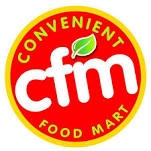

In [ ]:
#@title 1
%cd "/content/drive/MyDrive/bootcamp datascience alura M3/Challenge2_Esencia_del_Cliente"
from IPython.display import Image
Image(filename="images_foodmart.jpg")



# **Acerca de FOOD MART**

Food Mart (CFM) es una cadena de tiendas de conveniencia de Estados Unidos. La sede de la empresa privada está ubicada en Mentor, Ohio, y actualmente hay aproximadamente 325 tiendas ubicadas en Estados Unidos. Convenient Food Mart opera en el sistema de franquicia.

Food Mart era la tercera cadena de tiendas de conveniencia más grande del país en 1988.

La bolsa NASDAQ eliminó Convenient Food Mart el mismo año cuando la compañía no cumplió con los requisitos de informes financieros.
Ahora esta en proceso de recuperación económica y requiere analizar la información de sus clientes para implementar las mejores estrategias con el fin de aumentar sus ventas.

En este modelo vamos a desarrollar técnicas de clusterización para agrupar a los clientes de acuerdo a sus preferencias y hábitos de consumo. Contamos con un  Dataset que tiene más de 60.000 clientes que contiene sus INGRESOS, DETALLES DE PROMOCIÓN, DATOS DE LA TIENDA, DATOS DE VENTAS, COSTO DE MEDIOS, entre otra información relevante.

# 1- Configuración del Ambiente

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',None)# set_option()display.max_rows aumenta el número de filas en la vista previa  del DataFrame
pd.set_option('display.max_columns',None) # set_option()display.max_columns aumenta el número de columnas en la vista previa  del DataFrame

# 2- Obtención de los datos

## 2.1 Obtención del dataset inicial


In [ ]:
!python '/content/drive/MyDrive/bootcamp datascience alura M3/Challenge2_Esencia_del_Cliente/'

/usr/bin/python3: can't find '__main__' module in '/content/drive/MyDrive/bootcamp datascience alura M3/Challenge2_Esencia_del_Cliente/'


In [ ]:
# Se carga el dataset a google drive y se descarga en un DataFrame pandas como 'df'
df = pd.read_csv('/content/drive/MyDrive/bootcamp datascience alura M3/Challenge2_Esencia_del_Cliente/media prediction and its cost.csv')
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df['avg. yearly_income'].value_counts()

$30K - $50K      19514
$10K - $30K      12959
$50K - $70K      10493
$70K - $90K       7544
$130K - $150K     3410
$90K - $110K      2737
$110K - $130K     2590
$150K +           1181
Name: avg. yearly_income, dtype: int64

## 2.2 Transformaciones al dataset inicial

Como el dataset original está en inglés, vamos a dejar todo en español para una mejor comprensión del mismo. La idea es no invertir tiempo en la traducción del dataset y, por ello usaremos un archivo de python que contiene los diccionarios con las traducciones.

In [ ]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [ ]:
# Cambiamos el nombre de las columnas al español con el diccionario 'columnas' y renombraremos el dataset como 'df_esp'
df_esp = df.rename(columns=columnas)
df_esp.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
39762,Snack Foods,Snack Foods,Food,2.46,1.2054,3.0,Sales Days,USA,M,M,2.0,Graduate Degree,Bronze,Management,Y,4.0,$70K - $90K,1.0,4.0,Horatio,0.82,16.40,15.30,1.0,0.0,14.0,Supermarket,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,Bulk Mail,116.74
50303,Kitchen Products,Household,Non-Consumable,6.45,2.5800,3.0,Green Light Days,Mexico,S,M,4.0,Partial High School,Normal,Skilled Manual,N,2.0,$10K - $30K,0.0,2.0,High Quality,2.15,9.01,8.01,0.0,0.0,6.0,Gourmet Supermarket,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,Daily Paper,75.76
13740,Hot Beverages,Beverages,Drink,5.48,2.1920,4.0,Big Promo,Mexico,M,M,3.0,Bachelors Degree,Bronze,Professional,Y,2.0,$70K - $90K,0.0,2.0,Super,1.37,7.96,5.96,0.0,0.0,16.0,Deluxe Supermarket,Merida,Yucatan,30797.0,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,"Sunday Paper, Radio",110.56
45452,Vegetables,Canned Foods,Food,7.62,2.4384,3.0,Double Down Sale,USA,S,F,1.0,Bachelors Degree,Bronze,Professional,N,4.0,$50K - $70K,0.0,4.0,Pleasant,2.54,19.90,17.80,1.0,0.0,25.0,Supermarket,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Daily Paper,55.96
42481,Pain Relievers,Health and Hygiene,Non-Consumable,8.49,3.3111,3.0,Big Time Savings,USA,M,F,3.0,Graduate Degree,Golden,Professional,Y,3.0,$110K - $130K,3.0,3.0,Steady,2.83,11.80,9.80,1.0,0.0,18.0,Gourmet Supermarket,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Daily Paper,77.32


In [ ]:
# Ahora traducimos las categorías dentro de las columnas con el diccionario respectivo:
df_esp.categoria_alimento.drop_duplicates()
df_esp['categoria_alimento'] = df_esp['categoria_alimento'].replace(categoria_alimento)
df_esp.departamento = df_esp.departamento.replace(departamento)
df_esp.tipo = df_esp.tipo.replace(tipo)
df_esp.promocion = df_esp.promocion.replace(promocion)
df_esp.escolaridad = df_esp.escolaridad.replace(escolaridad)
df_esp.miembro = df_esp.miembro.replace(miembro)
df_esp.ocupacion = df_esp.ocupacion.replace(ocupacion)
df_esp.pais = df_esp.pais.replace(pais)
df_esp.estado_civil = df_esp.estado_civil.replace(estado_civil)
df_esp.genero = df_esp.genero.replace(genero)
df_esp.vivienda_propia = df_esp.vivienda_propia.replace(vivienda_propia)
df_esp.ingreso_anual = df_esp.ingreso_anual.replace(ingreso_anual)
df_esp.comercio = df_esp.comercio.replace(comercio)
df_esp.divulgacion = df_esp.divulgacion.replace(divulgacion)
df_esp.numero_hijos = df_esp.numero_hijos.astype(int)
df_esp['promedio_autos(aprox)']= df_esp['promedio_autos(aprox)'].astype(int)
df_esp.head(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1,20000,1,1,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4,60000,0,4,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1,20000,0,1,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2,40000,2,2,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2,40000,0,2,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


Vamos a reducir el número de categorías de algunas columnas con el fin de aumentar la eficiencia del modelo y corra más rapido:

In [ ]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

# Creamos nuevos diccionarios para organizar mejor la columna categoria_alimentos:
enlatados= {
    'Atún enlatado': 'Enlatados',
    'Anchoas enlatadas': 'Enlatados',
    'Almejas enlatadas': 'Enlatados',
    'Ostras enlatadas': 'Enlatados',
    'Camarones enlatados':'Enlatados',
    'Sardinas enlatadas':'Enlatados',
    'Sopa enlatada':'Enlatados'
}

vegetales_frutas = {
    'Vegetales':'Vegetales y frutas',
    'Fruta':'Vegetales y frutas',
    'Vegetales envasados':'Vegetales y frutas'
}

alimentos_desayuno={
    'Alimentos para el desayuno': 'Alimentos para el desayuno',
    'Productos lácteos':'Alimentos para el desayuno',
    'Mermeladas y jaleas':'Alimentos para el desayuno',
    'Pan':'Alimentos para el desayuno',
    'Huevos':'Alimentos para el desayuno'
}

bebidas ={
    'Bebidas': 'Bebidas',
    'Cerveza y vino':'Bebidas',
    'Bebidas calientes':'Bebidas',
    'Bebidas carbonatadas':'Bebidas',
    'Bebidas de jugo puro':'Bebidas'
}

higiene={
    'Higiene':'Higiene',
    'Productos de papel':'Higiene',
    'Productos de baño':'Higiene',
    'Suministros de limpieza':'Higiene'
}

medicamentos={
    'Analgésicos':'Medicamentos',
    'Remedios para el resfriado':'Medicamentos',
    'Descongestionantes':'Medicamentos'
}

miscelaneos={
    'Misceláneos':'Misceláneos',
    'Velas':'Misceláneos',
    'Revistas':'Misceláneos',
    'Especialidades':'Misceláneos'
}
# Actualizamos la columna categoria_alimento con los nuevos diccionarios
categoria_alimento.update(enlatados)
categoria_alimento.update(vegetales_frutas)
categoria_alimento.update(alimentos_desayuno)
categoria_alimento.update(bebidas)
categoria_alimento.update(higiene)
categoria_alimento.update(medicamentos)

df_esp['categoria_alimento'] = df_esp['categoria_alimento'].replace(categoria_alimento)

# Repetiremos el proceso con la columna divulgacion.
divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'}

periodico_diario={
      'Periódico diario':'Periodico diario',
      'Periódico diario, radio':'Periodico diario',
      'Periódico diario, radio, televisión':'Periodico diario',
  }

periodico_dominical={
      'Periódico dominical':'Periódico dominical',
      'Periódico dominical, radio':'Periódico dominical',
      'Periódico dominical, radio, televisión':'Periódico dominical'
  }

divulgacion.update(periodico_diario)
divulgacion.update(periodico_dominical)

df_esp['divulgacion'] = df_esp['divulgacion'].replace(divulgacion)

In [ ]:
df_esp.categoria_alimento.drop_duplicates().info()

<class 'pandas.core.series.Series'>
Int64Index: 24 entries, 0 to 59660
Series name: categoria_alimento
Non-Null Count  Dtype 
--------------  ----- 
24 non-null     object
dtypes: object(1)
memory usage: 384.0+ bytes


Ya tenemos el dataset *'df_esp'* traducido y listo para realizar el anális exploratorio de los datos

# 3- Exploración de los datos

## 3.1 Determinación del número de columnas del dataset a usar

In [ ]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

No se observan datos nulos en el dataset, hay 20 columnas con tipo de dato float64, 4 con int64 y 16 columnas tipo object o categóricas.

In [ ]:
df_esp.shape

(60428, 40)

Se comprueba que no hay registros duplicados en el dataset, y hay 60428 registros distribuidos en 40 columnas

In [ ]:
df_esp.describe()

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,costo
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,58312.371748,0.829351,2.200271,2.115258,13.806433,11.796289,0.558665,0.350434,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,36093.954105,1.303424,1.109644,0.932829,4.622693,4.682986,0.496551,0.477110,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,40000.000000,0.000000,1.000000,1.410000,9.700000,7.710000,0.000000,0.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,40000.000000,0.000000,2.000000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,80000.000000,1.000000,3.000000,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,160000.000000,5.000000,4.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


Voy a crear un mapa de calor donde se evaluará la correlación entre las variables numéricas(incluyen los tipos de datos *float64* y *int64*) para determinar si hay columnas con alta correlación tanto positiva como negativa.

<ipython-input-17-79e49d050eec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_esp.corr(), annot=True, cmap='viridis');


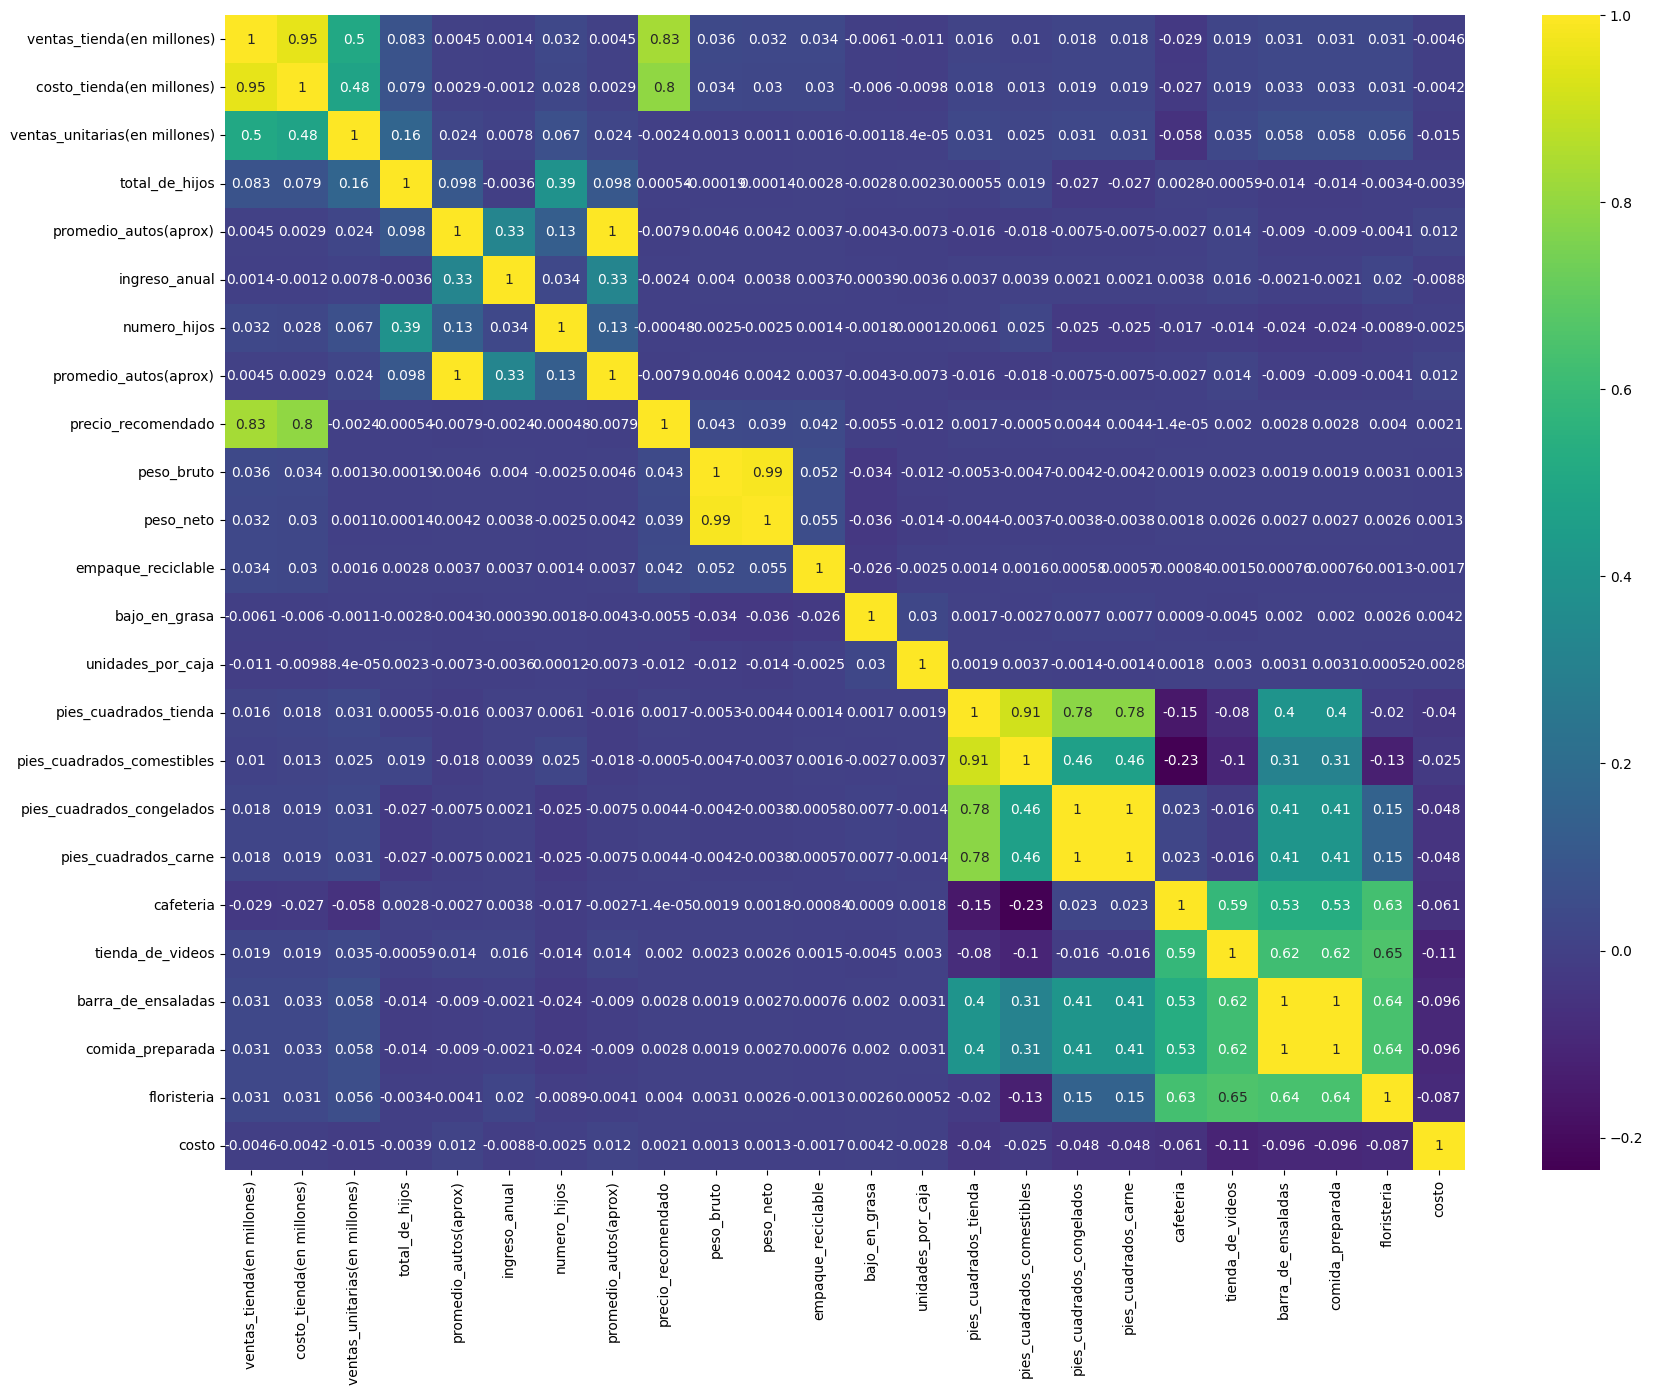

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df_esp.corr(), annot=True, cmap='viridis');

Consideraré los características superiores a 0,9 o inferiores a -0,9 como una correlación positiva fuerte y una correlación negativa fuerte, respectivamente. En esos casos procederemos a eliminar una de las dos columnas con fuerte correlación por que ofrecen las mismas características.

* Como muestran los gráficos, la comida_preparada y la **barra_de_ensaladas** tienen una fuerte relación positiva
  (tienen 1 como punto de correlación)

* **promedio_autos(aprox)** es una columna que se repite

* peso_neto y **peso_bruto**  tienen una correlación  
  positiva de 0,99

* **pies_cuadrados_carne** y pies_cuadrados_congelados  
  tienen una fuerte correlación de 1

* ventas_tienda(en millones) y **costo_tienda(en millones)**
  también tienen una alta correlación con 0,95

*  pies_cuadrados_comestibles con **pies_cuadrados_tienda** tienen una correlación de 0.91

* En conclusión, eliminaremos las columnas marcadas

In [ ]:
df_esp = df_esp.drop(columns=['barra_de_ensaladas', 'promedio_autos(aprox)', 'peso_bruto', 'pies_cuadrados_carne','costo_tienda(en millones)', 'pies_cuadrados_tienda'])

df_esp.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,ingreso_anual,numero_hijos,marca,precio_recomendado,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_comestibles,pies_cuadrados_congelados,cafeteria,tienda_de_videos,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,20000,1,Carrington,1.84,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Periodico diario,126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,60000,0,Carrington,1.84,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Periodico diario,59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,20000,0,Carrington,1.84,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Periodico diario,84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,40000,2,Carrington,1.84,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,40000,0,Golden,1.36,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df_esp.shape

(60428, 33)

## 3.2 Descripción del tipo de cliente

In [ ]:
df_esp.numero_hijos.value_counts()

0    37609
1     8811
2     5841
3     4391
4     2430
5     1346
Name: numero_hijos, dtype: int64

Vamos a hacer una exploración de los datos respecto a las características de los clientes que compran los productos

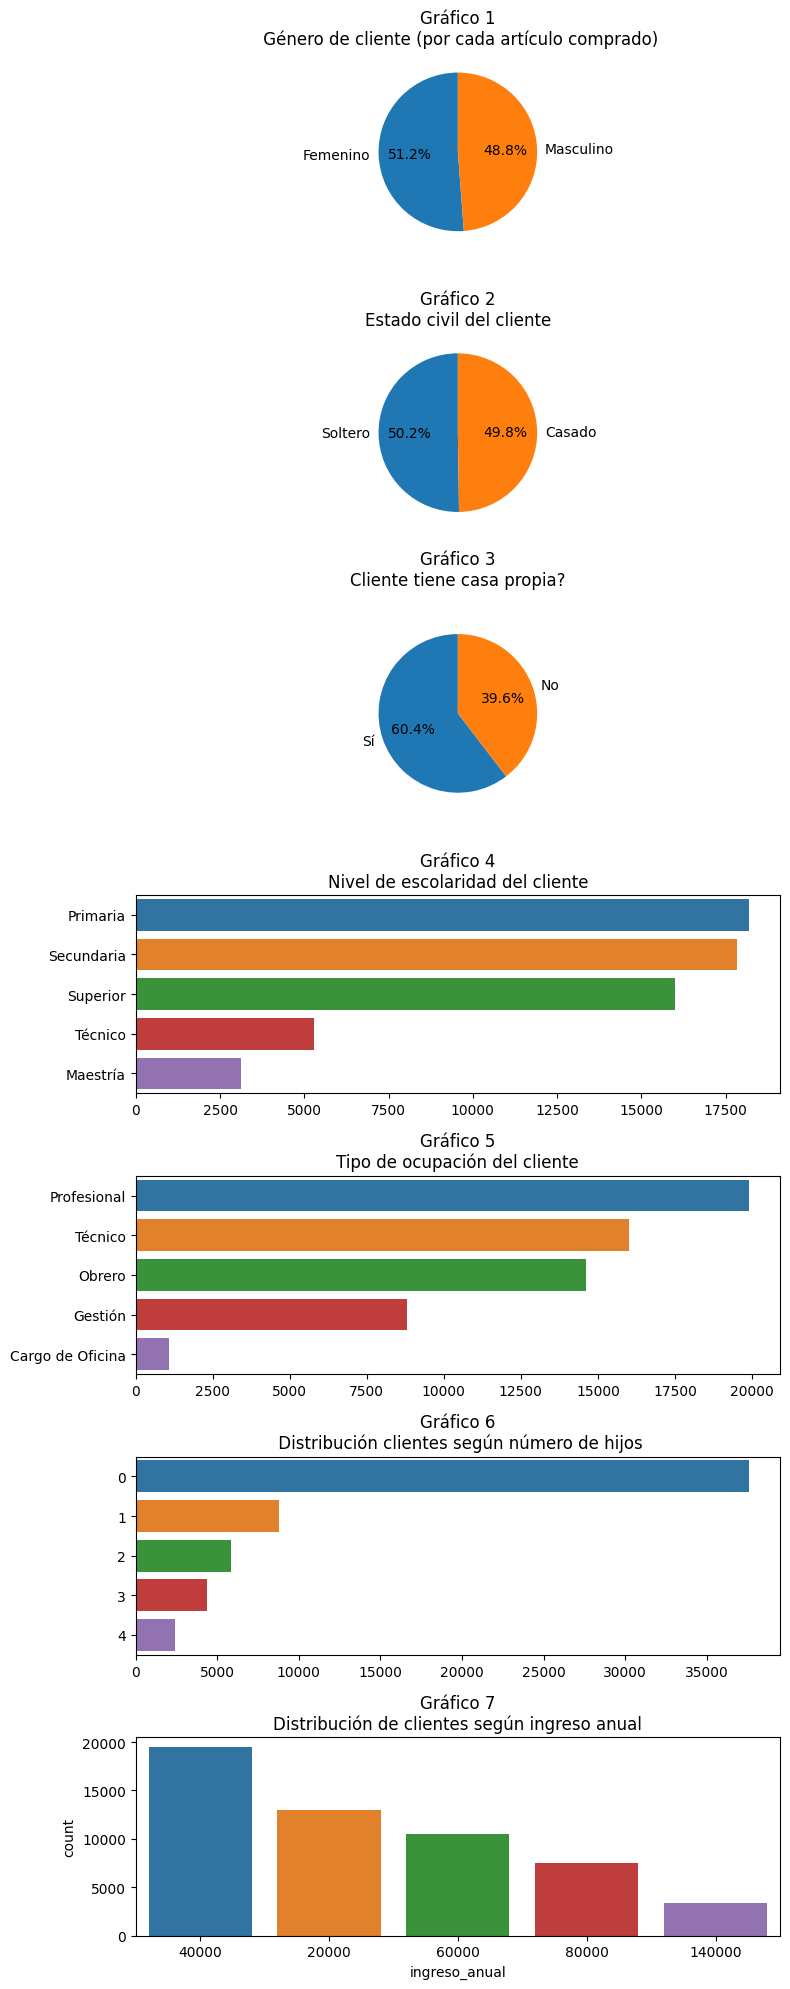

In [ ]:
_, ax = plt.subplots(7,1, figsize=(8,20))

gender_counts = df_esp['genero'].value_counts()
ax[0].pie(gender_counts, labels=['Femenino','Masculino'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gráfico 1\n Género de cliente (por cada artículo comprado)')

marital_status_counts = df_esp['estado_civil'].value_counts()
ax[1].pie(marital_status_counts, labels=['Soltero','Casado'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Gráfico 2\nEstado civil del cliente')

vivienda_propia_counts = df_esp['vivienda_propia'].value_counts()
ax[2].pie(vivienda_propia_counts, labels=['Sí','No'], autopct='%1.1f%%', startangle=90)
ax[2].set_title('Gráfico 3\nCliente tiene casa propia?\n')

sns.countplot(ax=ax[3],data=df_esp, y='escolaridad',order=['Primaria', 'Secundaria', 'Superior', 'Técnico', 'Maestría'])
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_yticks([0,1,2,3,4],
                 labels =['Primaria', 'Secundaria', 'Superior', 'Técnico', 'Maestría'])
ax[3].set_title('Gráfico 4\nNivel de escolaridad del cliente')

sns.countplot(ax=ax[4], data=df_esp, y='ocupacion',order=['Profesional','Técnico','Obrero','Gestión','Cargo de Oficina'])
ax[4].set_ylabel(None)
ax[4].set_xlabel(None)
ax[4].set_yticks([0,1,2,3,4],
                labels=['Profesional','Técnico','Obrero','Gestión','Cargo de Oficina'])
ax[4].set_title('Gráfico 5\nTipo de ocupación del cliente')

sns.countplot(ax= ax[5], data= df_esp,y='numero_hijos',order = [0,1,2,3,4])
ax[5].set_ylabel(None)
ax[5].set_xlabel(None)
ax[5].set_yticks([0,1,2,3,4])
ax[5].set_title('Gráfico 6\n Distribución clientes según número de hijos')

#sns.countplot(ax= ax[6], data= df_esp,y='ingreso_anual',order = [40000,20000,60000,80000,140000])
sns.countplot(x='ingreso_anual', data= df_esp, order = df_esp.value_counts("ingreso_anual").head().index, ax =  ax[6],)
ax[6].set_title('Gráfico 7\nDistribución de clientes según ingreso anual')

plt.tight_layout()
plt.show();


En el **gráfico 1** vemos que la mayoría de los clientes son mujeres aunque no por mucha diferencia respecto a los hombres(51.2% vs. 48.8%)

En el **gráfico 2** vemos que la proporción entre clientes solteros y casados esta balanceada(50.2% vs. 49.8%)

En el **gráfico 3** vemos que la mayoría de los clientes tiene casa propia(60.4%)

En el **gráfico 4** vemos que la mayoría de los clientes tiene educación primaría(18201), seguido muy cerca por los que tienen educación secundaria(17838), también hay cantidad importante de clientes que tienen educación superior(15994)

En el **gráfico 5** vemos que la mayoría de los clientes ejerce una profesión(19915), seguido muy cerca por los técnicos(15995), también hay cantidad importante de obreros(14624)

En el **gráfico 6** vemos que la mayoría de los clientes no tiene hijos(37609)

Finalmente en el **gráfico 7** vemos que la mayor parte de clientes tiene un ingreso anual entre USD 30000 y USD  50000, seguido por los que tienen un ingreso entre USD 10000 y USD 30000

## 3.3 Distribución de las ventas

Ahora haremos un análisis de las ventas

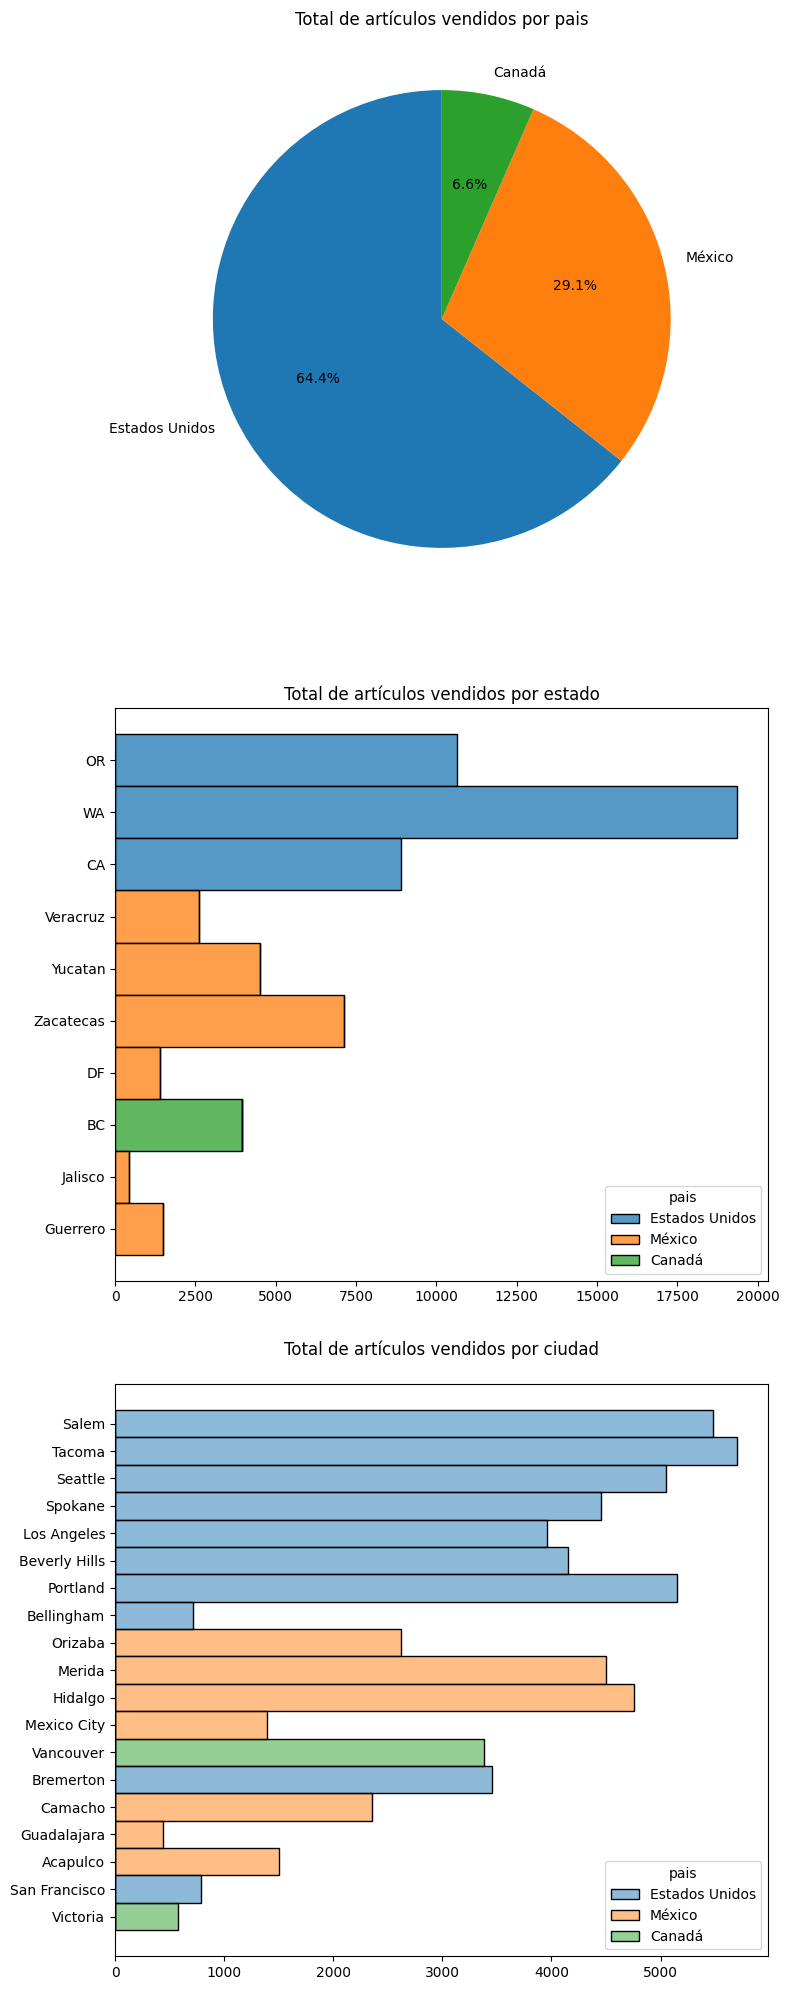

In [ ]:
plt.style.use('fast')# Definimos el estilo 'fast' para nuestros gráficos en matplotlib

_, ax = plt.subplots(3,1, figsize=(8,20))
pais_conteo = df_esp['pais'].value_counts()
ax[0].pie(pais_conteo, labels=['Estados Unidos', 'México','Canadá'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Total de artículos vendidos por pais')

estado_orden = df_esp['estado'].value_counts().index  # Get the order based on counts
sns.histplot(ax=ax[1], data=df_esp, y='estado', hue='pais', multiple='stack')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('\nTotal de artículos vendidos por estado')



sns.histplot(ax=ax[2], data=df_esp, y='ciudad', hue='pais')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('\nTotal de artículos vendidos por ciudad\n')
plt.tight_layout()
plt.show();

En estos gráficos observamos que más del 64% de las ventas se concentran en Estados Unidos principalmente en el estado de Washington, seguido por Oregon y California.

Mexico tiene alrededor del 29% de las ventas siendo los estados de Zacatecas y Yucatan donde más se concentran las ventas.

En cuanto a Canada representa solo el 6% del total de ventas y se concentra principalmente en el estado de British Columbia.

In [ ]:
data1 = df_esp.groupby("categoria_alimento")[["ventas_tienda(en millones)"]].sum().sort_values(by=['ventas_tienda(en millones)'],ascending=[False]).reset_index().head(20)
data2 = df_esp.groupby("comercio")[["ventas_tienda(en millones)"]].sum().sort_values(by=['ventas_tienda(en millones)'],ascending=[False]).reset_index()
data3 = df_esp.groupby("promocion")[["ventas_tienda(en millones)"]].sum().sort_values(by=['ventas_tienda(en millones)'],ascending=[False]).reset_index().head(20)
data4 = df_esp.groupby("tipo")[["ventas_tienda(en millones)"]].sum().sort_values(by=['ventas_tienda(en millones)'],ascending=[False]).reset_index().head(20)
data5 = df_esp.groupby("divulgacion")[["ventas_tienda(en millones)"]].sum().sort_values(by=['ventas_tienda(en millones)'],ascending=[False]).reset_index().head(20)
data6 = df_esp.groupby("departamento")[["ventas_tienda(en millones)"]].sum().sort_values(by=['ventas_tienda(en millones)'],ascending=[False]).reset_index().head(20)

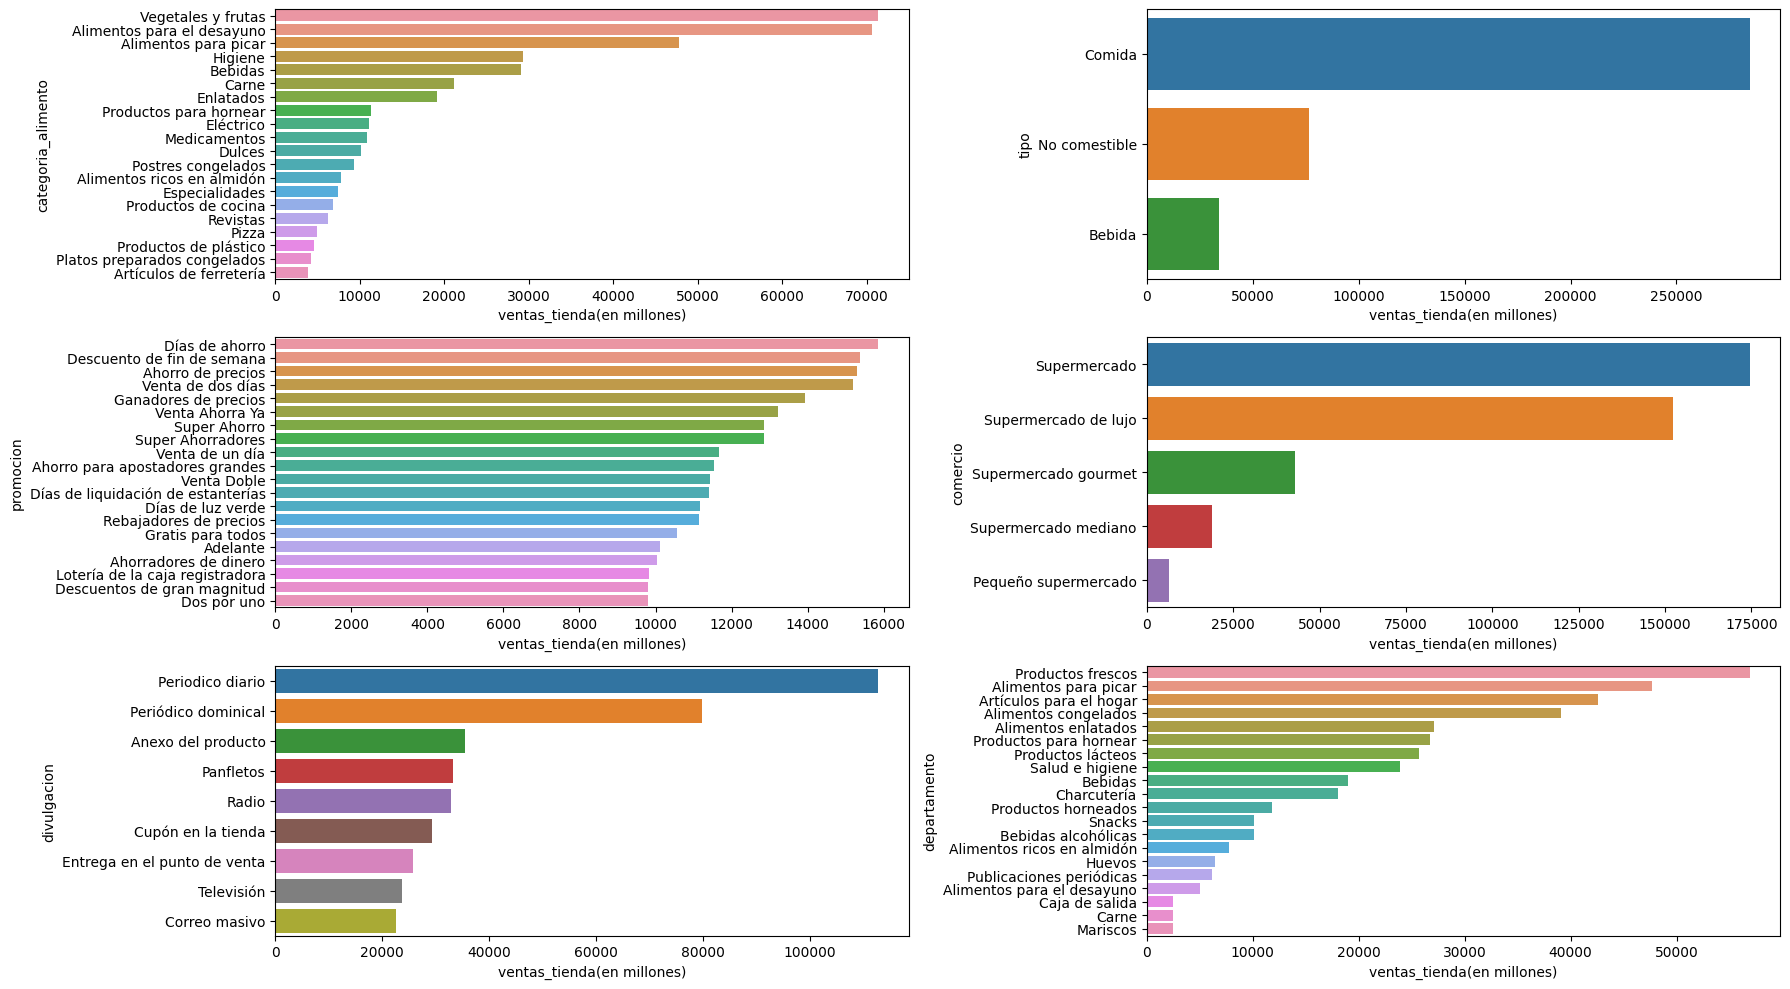

In [ ]:
# Crear una figura y los subplots
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))

sns.barplot(data1, y= 'categoria_alimento', x="ventas_tienda(en millones)", ax = ax1)
sns.barplot(data4, y= 'tipo', x="ventas_tienda(en millones)", ax = ax2)
sns.barplot(data3, y= 'promocion', x="ventas_tienda(en millones)", ax = ax3)
sns.barplot(data2, y= 'comercio', x="ventas_tienda(en millones)", ax = ax4)
sns.barplot(data5, y= 'divulgacion', x="ventas_tienda(en millones)", ax = ax5)
sns.barplot(data6, y= 'departamento', x="ventas_tienda(en millones)", ax = ax6)
plt.tight_layout()
plt.show();

En estos gráficos observamos que en la **categoria_alimentos** las ventas son en mayor medida para 'vegetales y frutas', seguido de 'Alimentos para el desayuno' y de 'Alimentos para picar', en síntesis el grueso de las ventas son de comestibles, lo que se corrobora en el gráfico de la categoría **tipo**.

En cuanto a la categoría **promocion** hay 4 que se destacan: 'Dias de ahorro' que es la que mas ventas ha generado aunque seguido muy cerca por 'Descuento fin de semana','Ahorro de precio' y 'Venta de dos días' en ese orden pero con muy poca distancia entre ellas.

Respecto a la categoría **comercio** la mayor parte de la ventas ocurren en los supermercados y en los supermercados de lujo con mas de la mitad de las ventas entre ellos.

Vemos que en la categoría **divulgación** principalmente se destacan las correspondientes a periódico diario y periodico dominical,las cuales también incluyen avisos tanto en periódicos como en radio y televisión.

Finalmente en cuanto a la categoría **departamento** vemos que las ventas se concentran en los departamentos de productos comestibles tales como 'Productos frescos','Alimentos para picar' y 'Alimentos congelados' siendo la exxcepción el departamento de 'Artículos para el hogar'

# 4-Preprocesamiento y Obtención de Features

## 4.1 Transformaciones y selección de atributos

Haremos un ciclo for para crear una lista con las columnas con datos categóricos

In [ ]:
# Separamos las columnas categóricas del dataframe
cat_columns= []
for column in df_esp.columns:
    if (df_esp[column].dtype == 'O'):
        cat_columns.append(column)
cat_columns

['categoria_alimento',
 'departamento',
 'tipo',
 'promocion',
 'pais',
 'estado_civil',
 'genero',
 'escolaridad',
 'miembro',
 'ocupacion',
 'vivienda_propia',
 'marca',
 'comercio',
 'ciudad',
 'estado',
 'divulgacion']

Luego de una evaluación mediante el análisis de los datos, decidí no utilizar las categorias **'departamento'** por brindar una información muy similar a la de 'categoria_alimento',  tampoco usaré la columna **'ciudad'** ya que considero que con la información de las columnas 'país' y 'estado' tenemos una aproximación correcta de la ubicación de los clientes.

También eliminaremos otras columnas tales como 'promocion','vivienda_propia','divulgacion','marca', entre otros que no consideramos relevantes para nuestro análisis

In [ ]:
cat_columns=[
 'tipo',
 'genero',
 'miembro',
 'estado_civil',
 'pais',
 'ocupacion',
 'escolaridad']

In [ ]:
# Separamos la columnas numéricas del dataframe
num_columns = []
for column in df_esp.columns:
    if (df_esp[column].dtype != 'O'):
        num_columns.append(column)
num_columns

['ventas_tienda(en millones)',
 'ventas_unitarias(en millones)',
 'total_de_hijos',
 'ingreso_anual',
 'numero_hijos',
 'precio_recomendado',
 'peso_neto',
 'empaque_reciclable',
 'bajo_en_grasa',
 'unidades_por_caja',
 'pies_cuadrados_comestibles',
 'pies_cuadrados_congelados',
 'cafeteria',
 'tienda_de_videos',
 'comida_preparada',
 'floristeria',
 'costo']

En el caso de las columnas numéricas no usaremos la columna **'total_de_hijos'** ya que aunque tiene distintos valores que la columna **'numero_hijos'** esta última es referida por la declaración de los mismos clientes por lo que para mí es de información mas confiable.

In [ ]:
num_columns= [
 'ventas_tienda(en millones)',
 'ingreso_anual',
 'numero_hijos',
 'precio_recomendado',
 'peso_neto',
 'pies_cuadrados_comestibles',
 'pies_cuadrados_congelados','empaque_reciclable',
 'bajo_en_grasa',
 'unidades_por_caja',
 'cafeteria',
 'tienda_de_videos',
 'comida_preparada',
 'floristeria'
 ]

Vamos a establecer un método de codificación para las variables categóricas, para sustituir las cadenas de texto por los valores numéricos, primero usaré el método **get_dummies** de pandas

In [ ]:
df_dummy = pd.get_dummies(df_esp[cat_columns], columns=cat_columns)
# Concatenamos el dataframe df_dummy con las columnas numéricas del dataframe original
df_esp_dummy = pd.concat([df_esp[num_columns], df_dummy], axis=1)
df_esp_dummy

In [ ]:
df_esp_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ventas_tienda(en millones)  60428 non-null  float64
 1   ingreso_anual               60428 non-null  int64  
 2   numero_hijos                60428 non-null  int64  
 3   precio_recomendado          60428 non-null  float64
 4   peso_neto                   60428 non-null  float64
 5   pies_cuadrados_comestibles  60428 non-null  float64
 6   pies_cuadrados_congelados   60428 non-null  float64
 7   empaque_reciclable          60428 non-null  float64
 8   bajo_en_grasa               60428 non-null  float64
 9   unidades_por_caja           60428 non-null  float64
 10  cafeteria                   60428 non-null  float64
 11  tienda_de_videos            60428 non-null  float64
 12  comida_preparada            60428 non-null  float64
 13  floristeria                 604

In [ ]:
df_esp_dummy.head()


,ventas_tienda(en millones),ingreso_anual,numero_hijos,precio_recomendado,peso_neto,pies_cuadrados_comestibles,pies_cuadrados_congelados,empaque_reciclable,bajo_en_grasa,unidades_por_caja,cafeteria,tienda_de_videos,comida_preparada,floristeria,tipo_Bebida,tipo_Comida,tipo_No comestible,genero_Femenino,genero_Masculino,miembro_Bronce,miembro_Normal,miembro_Oro,miembro_Plata,estado_civil_Casado,estado_civil_Soltero,pais_Canadá,pais_Estados Unidos,pais_México,ocupacion_Cargo de Oficina,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,escolaridad_Maestría,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico
0,7.36,20000,1,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,5.52,60000,0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,3.68,20000,0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
3,3.68,40000,2,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,4.08,40000,0,1.36,5.11,18670.0,5415.0,0.0,1.0,29.0,1.0,1.0,1.0,1.0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0


Ahora desde la librería Scikit-learn importamos el método **'OneHotEncoder'** para sustituir las variables categóricas por numéricas

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Creamos un DataFrame con las columnas categóricas
df_categ = df_esp[cat_columns]
# Instanciamos el OneHotEncoder
encoder = OneHotEncoder()

# Ajustamos y transformamos el codificador en las columnas categóricas.
df_encoded_array = encoder.fit_transform(df_categ).toarray()

# Creamos el DataFrame con las columnas codificadas
df_encoded = pd.DataFrame(df_encoded_array, columns=encoder.get_feature_names_out(cat_columns))

# Concatenamos el DataFrame codificado con el DataFrame original
df_esp_encoded = pd.concat([df_esp[num_columns], df_encoded], axis=1)

df_esp_encoded

In [ ]:
df_esp_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ventas_tienda(en millones)  60428 non-null  float64
 1   ingreso_anual               60428 non-null  int64  
 2   numero_hijos                60428 non-null  int64  
 3   precio_recomendado          60428 non-null  float64
 4   peso_neto                   60428 non-null  float64
 5   pies_cuadrados_comestibles  60428 non-null  float64
 6   pies_cuadrados_congelados   60428 non-null  float64
 7   empaque_reciclable          60428 non-null  float64
 8   bajo_en_grasa               60428 non-null  float64
 9   unidades_por_caja           60428 non-null  float64
 10  cafeteria                   60428 non-null  float64
 11  tienda_de_videos            60428 non-null  float64
 12  comida_preparada            60428 non-null  float64
 13  floristeria                 604

In [ ]:
df_esp_encoded.sample(5)

,ventas_tienda(en millones),ingreso_anual,numero_hijos,precio_recomendado,peso_neto,pies_cuadrados_comestibles,pies_cuadrados_congelados,empaque_reciclable,bajo_en_grasa,unidades_por_caja,cafeteria,tienda_de_videos,comida_preparada,floristeria,tipo_Bebida,tipo_Comida,tipo_No comestible,genero_Femenino,genero_Masculino,miembro_Bronce,miembro_Normal,miembro_Oro,miembro_Plata,estado_civil_Casado,estado_civil_Soltero,pais_Canadá,pais_Estados Unidos,pais_México,ocupacion_Cargo de Oficina,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,escolaridad_Maestría,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico
30299,2.10,40000,2,0.70,8.80,16844.0,4149.0,0.0,0.0,19.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14157,1.84,140000,0,0.92,5.63,22123.0,7041.0,1.0,0.0,35.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13724,9.28,60000,2,2.32,7.78,26354.0,5062.0,1.0,0.0,21.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16108,3.42,120000,3,1.71,5.77,22063.0,4923.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36726,2.88,120000,0,1.44,5.67,24390.0,9184.0,0.0,1.0,34.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Decidí usar el dataframe que obtuve luego del preprocesamiento con el método `get_dummies()`, y lo concateno con las columnas numéricas del dataframe **'df_esp'**, que la memoria usada por el dataframe **'df_esp_dummy'** tiene alrededor de 10 MB menos que el dataframe **'df_esp_encoded'** eso genera que se utilize menos capacidad de computo y el modelo corra más rápido, por eso dedidí usar  el dataframe **'df_esp_dummy'** para la estandarización.

## 4.2 Estandarización de los datos

En esta parte vamos a importar el método StandardScaler de la librería sklearn.preprocessing para estandarizar nuestros datos (que en este punto deben ser todos numéricos), para que todas las variables puedan ser tenidas en cuenta dentro de una misma escala.

In [ ]:

from sklearn.preprocessing import StandardScaler
x = df_esp_dummy
scaler = StandardScaler()
x_std = scaler.fit_transform(x)



Ahora tenemos un numpy array listo para empezar la clusterización.

# 5- Clusterización y Validación

 El algoritmo recomendado para la clusterización es KMeans, el objetivo es hallar el mejor número de clusters utilizando nuestro array **X_std** .

## 5.1 Variación del número de clusters


 Debemos instanciar de 3 a máximo 10 clusters con los algoritmos seleccionados,  obtener cómo mínimo el puntaje de Silhouette, aunque te recomiendo utilizar otras métricas como Davies-Bouldin y Calinski and Harabasz para que puedas decidir cuál es la mejor configuración para el número de clusters.

**Restricciones**: (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Creamos un DataFrame vacío para almacenar los resultados
df_metric = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

# Iteramos sobre diferentes números de clusters
for n_clusters in range(3,11):
  # Instanciamos el modelo de KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init = 10, max_iter = 300, random_state=42)

    # Entrenamos el modelo
    kmeans.fit(x_std)

    # Predecimos las etiquetas de los clusters
    cluster_labels = kmeans.labels_

    # Calculamos las métricas
    silhouette = silhouette_score(x_std, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(x_std, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(x_std, cluster_labels)

    # Agregar los resultados al DataFrame
    df_metric = df_metric.append({'Clusters': n_clusters,
                                    'Silhouette': silhouette,
                                    'Davies-Bouldin': davies_bouldin,
                                    'Calinski-Harabasz': calinski_harabasz},
                                    ignore_index=True)

df_metric


,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.074767,3.197807,4287.077949
1,4.0,0.082335,2.984415,3809.365208
2,5.0,0.080795,3.017291,3417.158403
3,6.0,0.088874,2.673021,3322.360574
4,7.0,0.075780,2.843537,3027.862802
5,8.0,0.081620,2.638216,2982.225186
6,9.0,0.081612,2.602029,2763.523132
7,10.0,0.080102,2.710998,2630.588735


Luego de hacer varias combinaciones de los atributos o columnas he determinado que cuando se utiliza el dataframe estandarizado **x_std** no se obtienen los valores correctos para las métricas 'Silhouette', 'Davies-Bouldin', y 'Calinski-Harabasz', tal como se observa en el dataframe **'df_metric'**.

Probaremos entonces con el dataframe sin estandarizar **'df_esp_dummy'**

In [ ]:
df_metrics = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
for n_clusters in range(3,11):
    kmeans = KMeans(n_clusters=n_clusters, n_init = 10, max_iter = 300, random_state=42)
    kmeans.fit(df_esp_dummy)
    cluster_labels = kmeans.labels_

    silhouette = silhouette_score(df_esp_dummy, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df_esp_dummy, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(df_esp_dummy, cluster_labels)

    df_metrics = df_metrics.append({'Clusters': n_clusters,
                                    'Silhouette': silhouette,
                                    'Davies-Bouldin': davies_bouldin,
                                    'Calinski-Harabasz': calinski_harabasz},
                                    ignore_index=True)
df_metrics

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.629119,0.530909,216993.342535
1,4.0,0.597753,0.487667,246025.006842
2,5.0,0.709964,0.439129,349145.144520
3,6.0,0.726142,0.456725,472120.651196
4,7.0,0.744802,0.413831,540572.278421
5,8.0,0.759026,0.380366,612778.815397
6,9.0,0.707946,0.415769,691750.137958
7,10.0,0.678614,0.460745,763966.770666


Observamos que en el nuevo dataframe **'df_metrics'** se cumple perfectamente con los valores mínimos y máximos para cada una de las métricas.

Luego procedemos a calcular la inercia del dataset **'df_esp_dummy'**

In [ ]:
inercia = []
for n_clusters in range(3,11):
  kmeans = KMeans(n_clusters=n_clusters, n_init = 10, max_iter = 300, random_state=42)
  kmeans.fit(df_esp_dummy)
  inercia.append(kmeans.inertia_)

df_inercia=pd.DataFrame({
    'n_clusters': range(3,11),
    'inercia':inercia
})


In [ ]:
# Verificamos el array 'inercia'
inercia

[9756930802035.02,
 6041160529217.762,
 3310754348487.6304,
 1992420808687.7793,
 1459998016220.693,
 1108892803137.4602,
 862191524488.0908,
 695400671296.9102]

Ahora vamos a crear un gráfico para que nos ayude a visualizar mejor la relación de los clusters con la inercia y aplicando la regla del codo, determinar el mejor número de clusters para nuestro modelo.

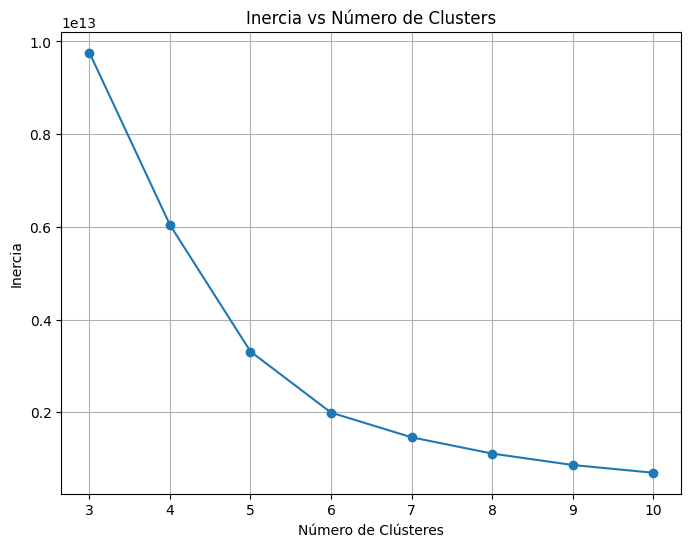

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df_inercia['n_clusters'], df_inercia['inercia'], marker='o')

plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Inercia vs Número de Clusters')

plt.grid(True)
plt.show()

Utilizamos la regla matemática para determinar el mejor número de clusters

In [ ]:
def ideal_cluster_number(inertia):
  x1,y1 = 2, inertia[0]
  x2,y2 = 20, inertia[-1]
  distance = []
  for i in range(len(inertia)):
    x0 = i + 2
    y0 = inertia[i]
    numerator= abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = ((y2-y1)**2 + (x2-x1)**2)**(1/2)
    distance.append(numerator/ denominator)

  return distance.index(max(distance)) + 2

In [ ]:
print(f'El número ideal de clusters es: {ideal_cluster_number(inercia)}')

El número ideal de clusters es: 6


La fórmula matemática nos indica que el numero de clusters ideal para nuestro modelo que son 6.

## 5.2 Evaluación de la estructura de los clusters

Ahora evaluaremos la estructura de los clusters tomando como referencia una baseline. Para generar la baseline, vamos a generar números aleatorios con el módulo random de numpy con las mismas dimensiones del dataset **'df_esp_dummy'** y lo almacenaremos en una variable llamada `'random_data' `y luego repetiré el paso anterior.

In [ ]:
# Comprobamos las dimensiones de nuestro dataframe
df_esp_dummy.shape

(60428, 38)

In [ ]:
#Generamos los datos aleatorios con las dimensiones correspondiente
random_data = np.random.rand(60428,38)
random_data


array([[0.56807849, 0.12852364, 0.6352601 , ..., 0.97298248, 0.74148215,
        0.42580077],
       [0.44969633, 0.31058992, 0.41457124, ..., 0.12074299, 0.34412466,
        0.46298016],
       [0.19146409, 0.36699114, 0.28372044, ..., 0.73613572, 0.84030596,
        0.83150047],
       ...,
       [0.84570799, 0.95523776, 0.13090679, ..., 0.84616587, 0.08382613,
        0.38967397],
       [0.96424135, 0.96288832, 0.18587874, ..., 0.97324193, 0.43156086,
        0.37687878],
       [0.97134695, 0.3337254 , 0.32557459, ..., 0.68308319, 0.82087272,
        0.35525015]])

In [ ]:
df_estruct = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
for n_clusters in range(3,11):
    kmeans = KMeans(n_clusters= n_clusters, random_state=42)
    kmeans.fit(random_data)
    cluster_labels = kmeans.labels_

    silhouette = silhouette_score(random_data, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(random_data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(random_data, cluster_labels)

    df_estruct = df_estruct.append({'Clusters': n_clusters,
                                    'Silhouette': silhouette,
                                    'Davies-Bouldin': davies_bouldin,
                                    'Calinski-Harabasz': calinski_harabasz},
                                    ignore_index=True)
df_estruct

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.016231,6.381850,1001.854868
1,4.0,0.016977,5.879875,876.751394
2,5.0,0.015550,5.636978,780.890625
3,6.0,0.015007,5.458577,706.444559
4,7.0,0.014975,5.302565,652.955232
5,8.0,0.015019,5.091947,612.414802
6,9.0,0.014832,4.960862,573.949106
7,10.0,0.014736,4.869734,541.400970


Observamos que los resultados de la validación de la variable `'random_data'` que tomamos como baseline, son mucho peores que los que hicimos con el dataset **'df_esp_dummy'** por tanto hemos validado la correcta estructura de este último.

## 5.3 Evaluación de la estabilidad de los clusters

Finalmente, debemos evaluar la estabilidad de los clusters con el número de clusters seleccionado en la validación. Para ello, debo segmentar **'df_esp_dummy'** en 3 o 5 partes iguales, (usando la función `array_split()` de numpy, y almacenar cada fragmento del dataset en una variable llamada set_1, set_2, ..., set_n) y repetir los pasos de validación para el número de clusters escogido en cada uno de los sets. Aquí lo verdaderamente importante es que los puntajes no presenten una variación mayor a ±5% entre sí. Esto va a garantizar que hay homogeneidad en la composición de los clusters.

In [ ]:
# Calculamos el número of filas en cada set
rows_per_set = len(df_esp_dummy) // 3
# Hacemos una partición en 3 partes iguales
sets = np.array_split(df_esp_dummy, 3)

# Nombramos cada set
set_1 = sets[0]
set_2 = sets[1]
set_3 = sets[2]


In [ ]:
set_1.shape

(20143, 38)

In [ ]:
set_2.shape

(20143, 38)

In [ ]:
set_3.shape

(20142, 38)

Confirmamos que segmentamos nuestro dataset en 3 partes con la misma cantidad de filas y columnas, como el modelo determinó que el número de clusters debe ser 6, con esa cantidad de clusters vamos a evaluar la estabilidad

In [ ]:
df_set_1 = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
for n_clusters in range(3,9):
    kmeans = KMeans(n_clusters= n_clusters, random_state=42)
    kmeans.fit(set_1)
    cluster_labels = kmeans.labels_

    silhouette = silhouette_score(set_1, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(set_1, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(set_1, cluster_labels)

    df_set_1 = df_set_1.append({'Clusters': n_clusters,
                                    'Silhouette': silhouette,
                                    'Davies-Bouldin': davies_bouldin,
                                    'Calinski-Harabasz': calinski_harabasz},
                                    ignore_index=True)
df_set_1

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.629391,0.529820,72059.914459
1,4.0,0.598039,0.486116,81906.651945
2,5.0,0.711515,0.436218,117455.794169
3,6.0,0.727768,0.454487,158427.978528
4,7.0,0.745953,0.411013,180797.332504
5,8.0,0.760095,0.376061,204687.515127


In [ ]:
df_set_2 = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
for n_clusters in range(3,9):
    kmeans = KMeans(n_clusters= n_clusters, random_state=42)
    kmeans.fit(set_2)
    cluster_labels = kmeans.labels_

    silhouette = silhouette_score(set_2, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(set_2, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(set_2, cluster_labels)

    df_set_2 = df_set_2.append({'Clusters': n_clusters,
                                    'Silhouette': silhouette,
                                    'Davies-Bouldin': davies_bouldin,
                                    'Calinski-Harabasz': calinski_harabasz},
                                    ignore_index=True)
df_set_2

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.628737,0.531100,71211.972594
1,4.0,0.598023,0.489376,81108.303031
2,5.0,0.708500,0.441612,114320.281369
3,6.0,0.725263,0.458242,155280.019333
4,7.0,0.744738,0.415167,179008.997765
5,8.0,0.758675,0.380200,201738.387292


In [ ]:
df_set_3 = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
for n_clusters in range(3,9):
    kmeans = KMeans(n_clusters= n_clusters, random_state=42)
    kmeans.fit(set_3)
    cluster_labels = kmeans.labels_

    silhouette = silhouette_score(set_3, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(set_3, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(set_3, cluster_labels)

    df_set_3 = df_set_3.append({'Clusters': n_clusters,
                                    'Silhouette': silhouette,
                                    'Davies-Bouldin': davies_bouldin,
                                    'Calinski-Harabasz': calinski_harabasz},
                                    ignore_index=True)
df_set_3

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.629199,0.531748,73715.351198
1,4.0,0.597151,0.487491,82982.593653
2,5.0,0.709836,0.439585,117372.094821
3,6.0,0.725353,0.457364,158364.398052
4,7.0,0.743674,0.415099,180700.348245
5,8.0,0.758260,0.384712,206267.534929


Ahora creamos una función `comparar_diferencias()` para determinar cual es la diferencia entre los valores de las métricas para cada una de las 3 particiones que hemos creado desde el dataset **'df_esp_dummy'**

In [ ]:
def comparar_diferencias(df1, df2, columns_to_compare,):
    diferencias = {}
    for column in columns_to_compare:
        if column in df1.columns and column in df2.columns:
            dif_percentage = abs((df1[column] - df2[column]) / df1[column]*100)
            diferencias[column] = dif_percentage

    return diferencias

# Columnas a comparar
columns_to_compare = ['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']

# Vemos las diferencias entre el set_1 y el set_2
dif_1_2_values = comparar_diferencias(df_set_1, df_set_2, columns_to_compare)

#  Vemos las diferencias entre el set_1 y el set_3
dif_1_3_values = comparar_diferencias(df_set_1, df_set_3, columns_to_compare)

#  Vemos las diferencias entre el set_2 y el set_3
dif_2_3_values = comparar_diferencias(df_set_2, df_set_3, columns_to_compare)


# Creamos una función para determinar las diferencias entre los valores de cada partición
def print_differences(differences, tolerancia):
    for column, diff in differences.items():
        if diff.any() > tolerancia:
            print(f"Difference in {column}:")
            print(diff)

# Imprimimos las diferencias entre el set_1 vs set_2
print(dif_1_2_values)

# Imprimimos las diferencias entre el set_1 vs set_3
print(dif_1_3_values)

# Imprimimos las diferencias entre el set_1 vs set_3
print(dif_2_3_values)


{'Clusters': 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Clusters, dtype: float64, 'Silhouette': 0    0.103913
1    0.002642
2    0.423635
3    0.344222
4    0.162787
5    0.186843
Name: Silhouette, dtype: float64, 'Davies-Bouldin': 0    0.241651
1    0.670487
2    1.236597
3    0.826048
4    1.010540
5    1.100657
Name: Davies-Bouldin, dtype: float64, 'Calinski-Harabasz': 0    1.176718
1    0.974706
2    2.669526
3    1.986997
4    0.989138
5    1.440795
Name: Calinski-Harabasz, dtype: float64}
{'Clusters': 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Clusters, dtype: float64, 'Silhouette': 0    0.030561
1    0.148524
2    0.235891
3    0.331870
4    0.305461
5    0.241389
Name: Silhouette, dtype: float64, 'Davies-Bouldin': 0    0.363909
1    0.282783
2    0.771842
3    0.633020
4    0.994059
5    2.300507
Name: Davies-Bouldin, dtype: float64, 'Calinski-Harabasz': 0    2.297306
1    1.313619
2    0.071260
3    0.040132
4    0.053643
5    0.771918
Name: C

Por simple observación, notamos que ninguna variación excede el 5%, de hecho la variación mas alta la vemos entre el set_1 y el set_2 respecto a la métrica Calinski-Harabasz con un 2.67%

De todas maneras, vamos a crear unas condicionales para verificar si la variabilidad de los valores de las métricas sobrepasan el 5% o no, lo que va a determinar su estabilidad.

In [ ]:
# Chequeando si la diferencia entre los valores es mayor a 5%
tolerancia = 5
if any(value > tolerancia for dif in dif_1_2_values.values() for value in dif):
    print("Diferencias exceden 5% entre el df_set_1 y el df_set_2.")
else:
    print("Diferencias son menores o iguales al 5% entre el df_set_1 and df_set_2.")

# Chequeando si la diferencia entre df_set_1 vs df_set_3 excede la tolerancia
if any(value > tolerancia for dif in dif_1_3_values.values() for value in dif):
    print("Diferencias exceden 5% entre el df_set_1 y el df_set_3.")
else:
    print("Diferencias son menores o iguales al 5% entre el df_set_1 and df_set_3.")

# Chequeando si la diferencia entre df_set_2 v els df_set_3 excede la tolerancia
if any(value > tolerancia for dif in dif_2_3_values.values() for value in dif):
    print("Diferencias exceden 5% entre el df_set_2 y el df_set_3.")
else:
    print("Diferencias son menores o iguales al 5% entre el df_set_2 and df_set_3.")

Diferencias son menores o iguales al 5% entre el df_set_1 and df_set_2.
Diferencias son menores o iguales al 5% entre el df_set_1 and df_set_3.
Diferencias son menores o iguales al 5% entre el df_set_2 and df_set_3.


## 5.4 Instanciando la mejor configuración de clusters

Vamos a instanciar el algoritmo de clusterización una vez , con la configuración escogida, y crearemos un nuevo atributo en el dataset `datos_raw` llamado **'cluster'** para almacenar los labels de los clusters.

In [ ]:
# Instantiate KMeans with n_clusters=6
datos_raw = df_esp_dummy
kmeans = KMeans(n_clusters=6, random_state=42)  # Set your desired random state for reproducibility

# Fit KMeans to your data and get cluster labels
datos_raw['cluster'] = kmeans.fit_predict(datos_raw)


 Vamos a realizar varios gráficos de dispersión para comparar las variables añadiendo una tercera dimensión con los clusters en el parámetro 'hue' del gráfico.

In [ ]:
datos_raw.head()

,ventas_tienda(en millones),ingreso_anual,numero_hijos,precio_recomendado,peso_neto,pies_cuadrados_comestibles,pies_cuadrados_congelados,empaque_reciclable,bajo_en_grasa,unidades_por_caja,cafeteria,tienda_de_videos,comida_preparada,floristeria,tipo_Bebida,tipo_Comida,tipo_No comestible,genero_Femenino,genero_Masculino,miembro_Bronce,miembro_Normal,miembro_Oro,miembro_Plata,estado_civil_Casado,estado_civil_Soltero,pais_Canadá,pais_Estados Unidos,pais_México,ocupacion_Cargo de Oficina,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,escolaridad_Maestría,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,cluster
0,7.36,20000,1,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,4
1,5.52,60000,0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,3.68,20000,0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,4
3,3.68,40000,2,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,2
4,4.08,40000,0,1.36,5.11,18670.0,5415.0,0.0,1.0,29.0,1.0,1.0,1.0,1.0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,2


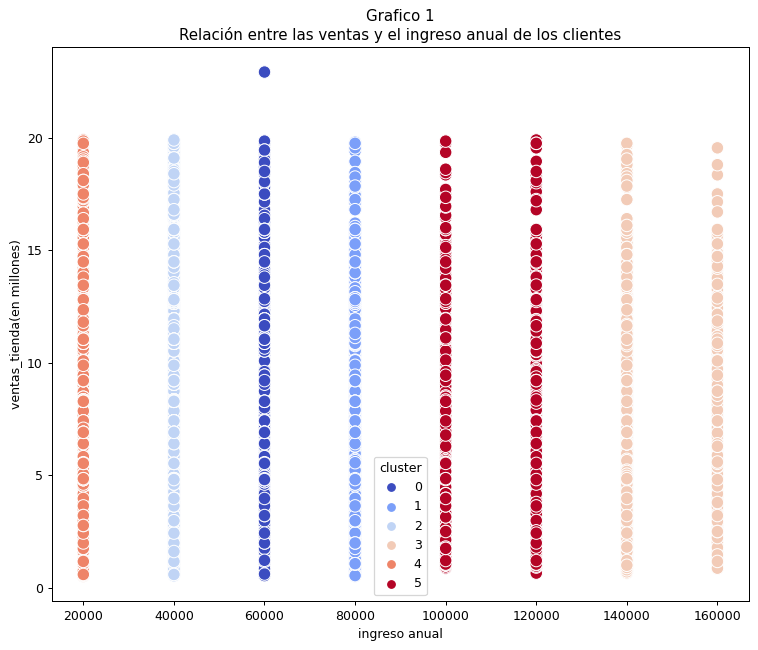

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='ingreso_anual',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 1\nRelación entre las ventas y el ingreso anual de los clientes")
plt.xlabel("ingreso anual")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

En el gráfico 1 observamos que en el **cluster 0** están las personas con un promedio de ingreso anual de USD 60.000, en el **cluster 1** las que tienen USD 80.000 en promedio de ingreso anual, en el **cluster 2** las de USD 40.000, en el **cluster 3** estan los que tienen ingreso más alto entre USD 140.000 y USD 160.000, en el **cluster 4** los que tienen menor ingreso entre USD 20.000, y finalmente en el **cluster 5** están los que tienen un ingreso promedio anual entre USD 100.000 y USD 120.000.

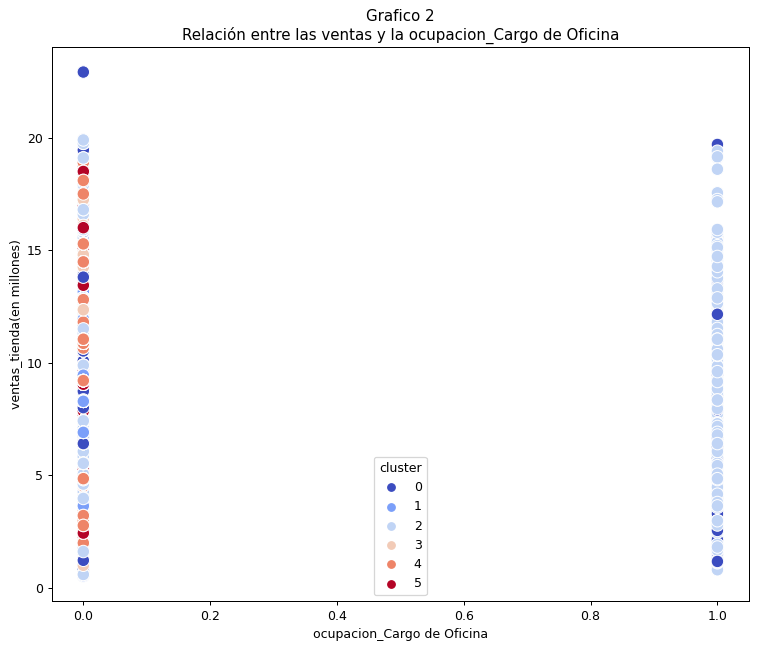

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='ocupacion_Cargo de Oficina',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 2\nRelación entre las ventas y la ocupacion_Cargo de Oficina")
plt.xlabel("ocupacion_Cargo de Oficina")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

En el gráfico 2 se observa que en el **cluster 2** estan mayormente las personas que ocupan cargos de oficina

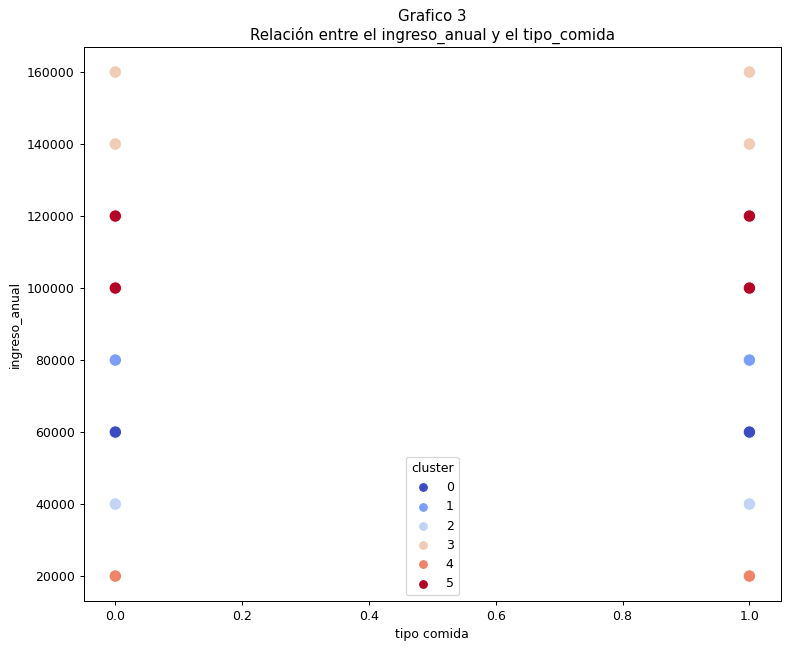

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='tipo_Comida',y='ingreso_anual' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 3\nRelación entre el ingreso_anual y el tipo_comida")
plt.xlabel("tipo comida")
plt.ylabel("ingreso_anual")
plt.show()

En este gráfico 3 se observa la misma distribución de los clusters que en el gráfico 1

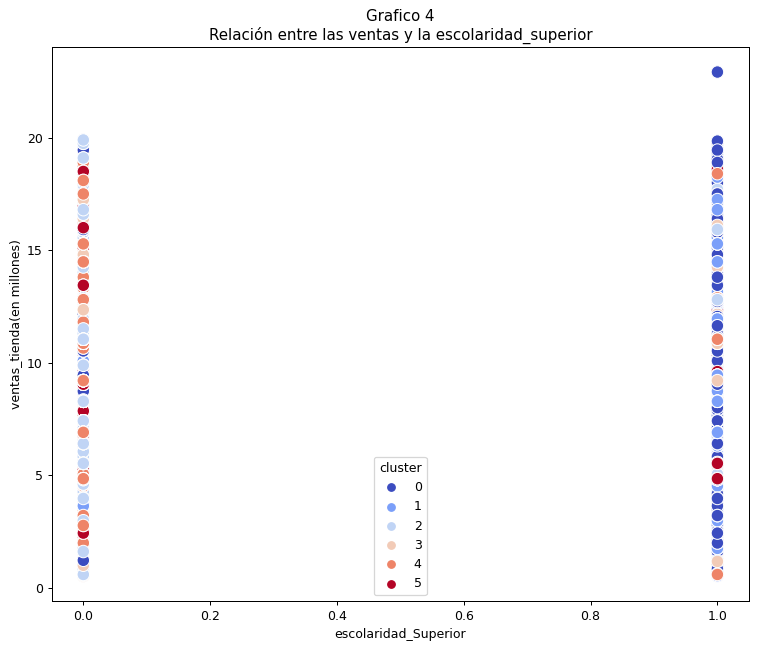

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='escolaridad_Superior',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 4\nRelación entre las ventas y la escolaridad_superior")
plt.xlabel("escolaridad_Superior")
plt.ylabel("ventas_tienda(en millones)")
plt.show()


En el gráfico 4 notamos que en **cluster 0** y **cluster 1** se concentran mayormente los clientes que tienen escolaridad superior

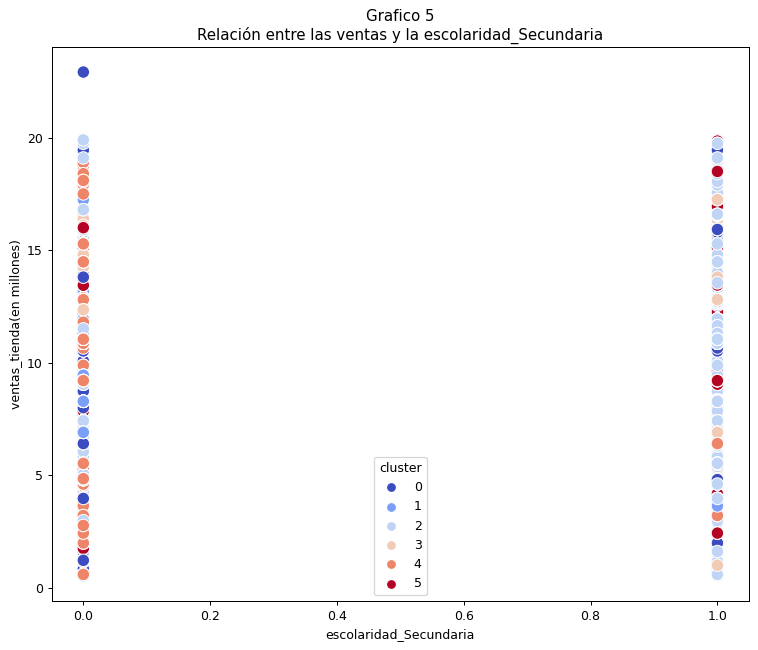

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='escolaridad_Secundaria',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 5\nRelación entre las ventas y la escolaridad_Secundaria")
plt.xlabel("escolaridad_Secundaria")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

En el gráfico 5 observamos que en el **cluster 2** están mayormente los clientes con la escolaridad secundaria

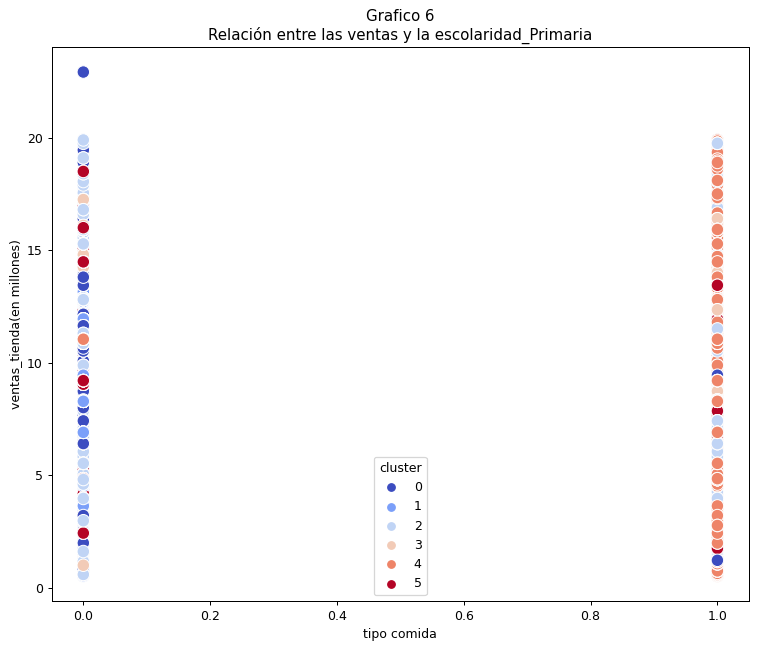

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='escolaridad_Primaria',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 6\nRelación entre las ventas y la escolaridad_Primaria")
plt.xlabel("tipo comida")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

En el gráfico 6 notamos que en el **cluster 4** se concentran en su mayoría los clientes con escolaridad primaria

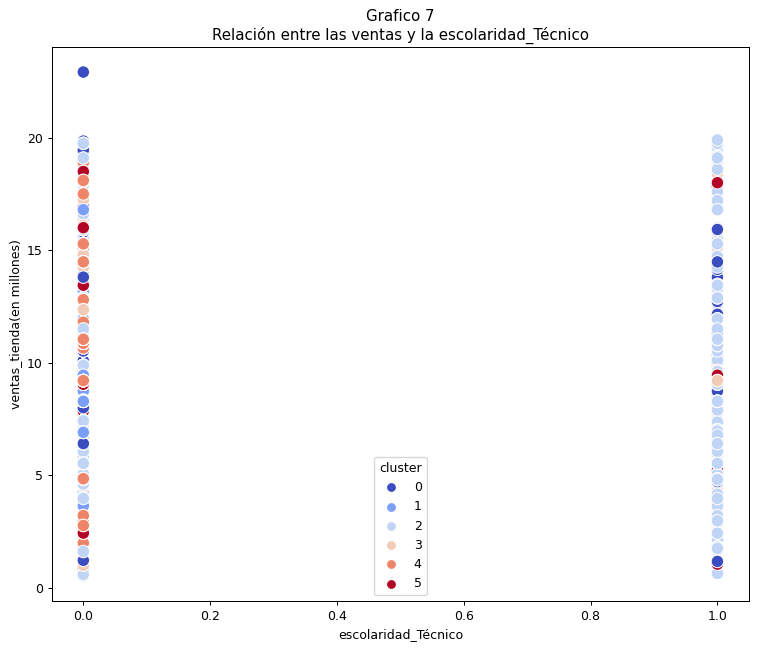

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='escolaridad_Técnico',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 7\nRelación entre las ventas y la escolaridad_Técnico")
plt.xlabel("escolaridad_Técnico")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

En el gráfico 7 vemos que los clientes en el **cluster 2** son en su mayoría de grado de escolaridad técnico.

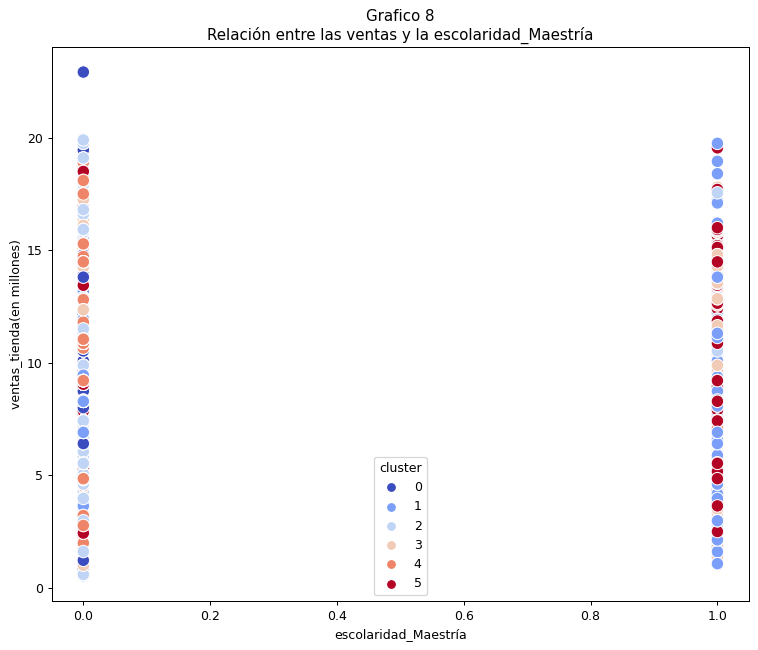

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='escolaridad_Maestría',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 8\nRelación entre las ventas y la escolaridad_Maestría")
plt.xlabel("escolaridad_Maestría")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

En el gráfico 8 se puede notar que en los **cluster 1** , **cluster 3** y **cluster 5** se concentran los clientes con grado de escolaridad maestría.


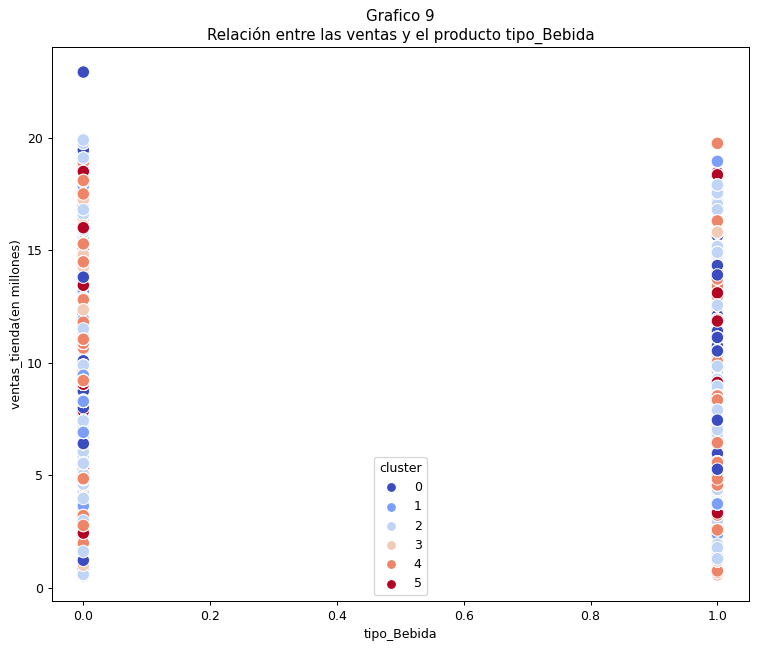

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='tipo_Bebida',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 9\nRelación entre las ventas y el producto tipo_Bebida")
plt.xlabel("tipo_Bebida")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

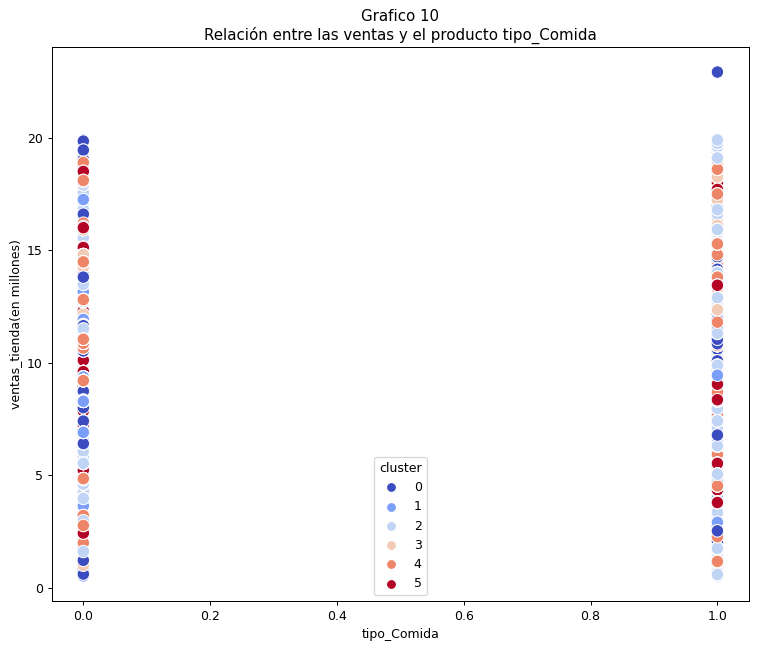

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='tipo_Comida',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 10\nRelación entre las ventas y el producto tipo_Comida")
plt.xlabel("tipo_Comida")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

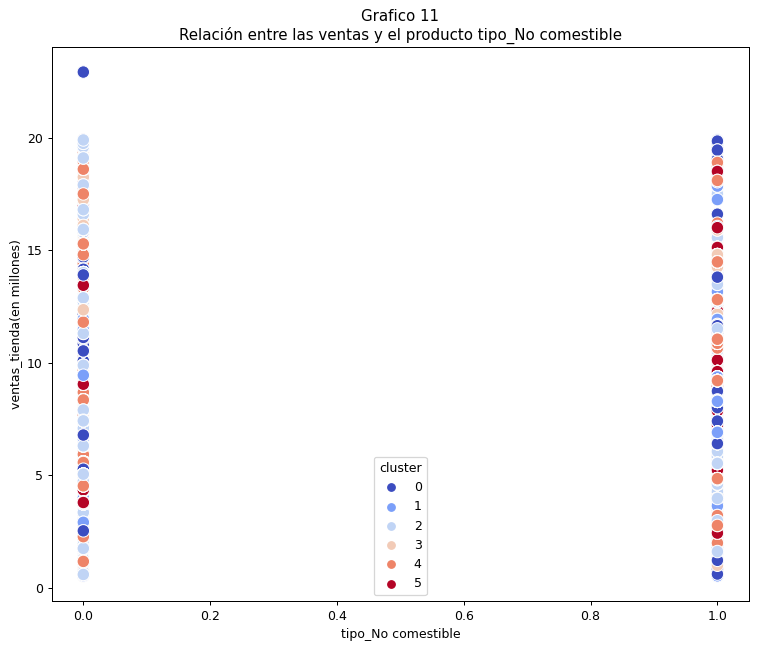

In [ ]:

fig, ax = plt.subplots(figsize = (10,8), dpi = 90)
ax = plt.gca()
sns.scatterplot(data = datos_raw,x='tipo_No comestible',y='ventas_tienda(en millones)' ,hue = 'cluster', palette = 'coolwarm', s = 100)
plt.title("Grafico 11\nRelación entre las ventas y el producto tipo_No comestible")
plt.xlabel("tipo_No comestible")
plt.ylabel("ventas_tienda(en millones)")
plt.show()

De la observación de los 3 últimos gráficos respecto al tipo de producto, las tendencias de consumo de cada cluster es:

**Cluster 0** tiende a comprar más productos tipo_bebida y compra ligeramente más productos_no comestibles.

**Cluster 1** esta balenceado su consumo de tipo_bebida, tiende a no comprar productos tipo_comida, y tiende a comprar más productos no_comestibles

**Cluster 2** tiende a comprar más productos tipo_comida, esta balanceado su consumo del tipo_bebida y compra menos productos tipo no_comestible

**Cluster 3** tiende a comprar más productos tipo_comida que tipo_bebida y tipo no_comestible

**Cluster 4** esta balanceado su consumo en los tres tipos de producto

**Cluster 5** tiende a comprar más productos tipo_comida y tipo_no comestibles

# 6-Descripción de los clusters

### CLUSTER 0 :

Representa a los clientes que tienen un ingreso medio, alrededor de $60000 anuales, y tienen normalmente escolaridad superior, muy probablemente universitaria, compra más productos tipo_bebida y ligeramente más productos_no comestibles.

**Estrategia a seguir**: Para este tipo de clientes se puede hacer una estrategia como descuentos en los precios de productos comestibles por uno o dos días a la semana, para que aumenten su consumo de productos del tipo_comida, hay que considerar que al ser clientes con un ingreso medio, no solo buscan precio sino también calidad y variedad en los productos, por lo que el contro de calidad para los productos es fundamental.

### CLUSTER 1:

Representa a los clientes que tienen un ingreso medio, alrededor de $80000 anuales, y tienen normalmente escolaridad superior muy probablemente universitaria o escolaridad_maestría, compra más productos no_comestibles.

**Estrategia a seguir:**
 Para este tipo de clientes se puede también implementar la misma estrategia que para el cluster 0, implementando días de descuento especial para productos tipo_bebida y tipo_comida y publicitar esos descuentos via e-mail o vía medios de difusión masiva como radio o TV.




### CLUSTER 2:

Representa a los clientes que tienen un ingreso menor que el promedio, alrededor de $40000 anuales, mayormente ocupan cargos de oficina, tienen en su mayoría de grado de escolaridad técnico y compra más productos tipo_comida.

**Estrategia a seguir:** Para este tipo de clientes la variable más importante para comprar es el precio, por lo que comprarán más en tanto los precios de nuestros productos sean menores que en la competencia, se podría hacer una investigación sobre cual de los productos tipo_bebida y tipo_comida tienen precios más competitivos y difundir dichos precios en anuncios grandes en la entrada de cada tienda y también via e-mail.

### CLUSTER 3:

Representa a los clientes que tienen ingreso más alto entre USD 140.000 y USD 160.000, cuentan con grado de escolaridad maestría, y compra más productos tipo_comida.

**Estrategia a seguir:** Este tipo de cliente de ingreso alto, busca principalmente calidad y marcas reconocidas, por lo que se necesita ofrecerle productos tipo gourmet, y productos orgánicos en tipo_comida. y en el rubro tipo_bebidas ofrecerle una variedad de bebidas de muy buena marca, quiza este tipo de oferta podría ubicarse en una zona VIP de cada tienda.

### CLUSTER 4:

Representa a los clientes que tienen menor ingreso entre USD 20.000 anuales, cuentan con grado de escolaridad primaria, y esta balanceado su consumo en los tres tipos de producto.

**Estrategia a seguir:** Este tipo de cliente es el de menores ingresos y tiene el perfil parecido al cluster 2 osea la variable más importante para la compra es el precio, por lo que publicitaremos en las entradas de la tienda o mediante medios de difusión masiva nuestros productos en todos los rubros con el mejor precio del mercado.

### CLUSTER 5:

Representa a los clientes que tienen un ingreso promedio anual alto, entre USD 100.000 y USD 120.000, cuentan con grado de escolaridad maestría. Tienden a comprar más productos tipo_comida y tipo_no comestibles.

**Estrategia a seguir:** Tiene un perfil similar al cluster 3, osea pertenece al segmento de ingresos altos y debemos ofrecerle productos de alta calidad en el rubro tipo_bebidas y ofrecerle quizá beneficios adicionales como cliente VIP.